<a href="https://colab.research.google.com/github/chitinglow/Classification-Machine-learning/blob/master/TimeSeriesTut3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# !pip install chart_studio

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf # Connects Plotly to Pandas
# Makes Plotly work in your Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [8]:

#def print_chart(csv, title, col):
#    df_1 = pd.read_csv(csv, index_col='Date', parse_dates=True)
#    f_1 = plt.figure(figsize=(12,6), dpi=100)
#    ax_1 = f_1.add_axes([0.0, 0.0, 0.9, 0.9])
#    ax_1.set_ylabel('Closing Price')
#    ax_1.set_title(title)
#    ax_1.plot(df_1.index, df_1[col])
#    ax_1.grid(True, color='0.6', dashes=(5,2,1,2))
#    ax_1.set_facecolor((0.9, 0.9, 0.9))
    
# A time series contains 3 components being a trend-cycle
# seasonal component, and everything else. 

# We have trends known as cyclical, which is where new ideas 
# generate growth that is then copied by others driving down 
# prices and leading to losses. It is hard to find a good entry
# or exit point with these, but they have a trend.
#print_chart('S&P.csv', 'S&P Prices', 'Close')
    
# As the Carnival Cruise price data shows us trends are either 
# horizontal, upward or downward
#print_chart('CCL.csv', 'Carnival Cruise Prices', 'Close')

# Southwest shows an example of repeating trends or seasonality
# The price rises in June, July, December and then falls
# print_chart('LUV.csv', 'Southwest Prices', 'Close')

In [11]:
df_2 = pd.read_csv('https://raw.githubusercontent.com/derekbanas/TimeSeriesAnalysis/main/PittsburghWeather.csv', index_col='Date', parse_dates=True)
df_2 = df_2.dropna() # Drop any missing data
# Get data since 2000
df_3 = df_2[df_2.index>'2000-01-01']
df_3

,tmax,tmin,prcp
Date,,,
2000-01-02,66.0,42.0,0.04
2000-01-03,62.0,52.0,0.58
2000-01-04,56.0,31.0,0.54
2000-01-05,32.0,24.0,0.03
2000-01-06,43.0,22.0,0.00
...,...,...,...
2019-12-27,57.9,41.0,0.02
2019-12-28,46.9,37.9,0.00
2019-12-29,55.9,39.9,0.52


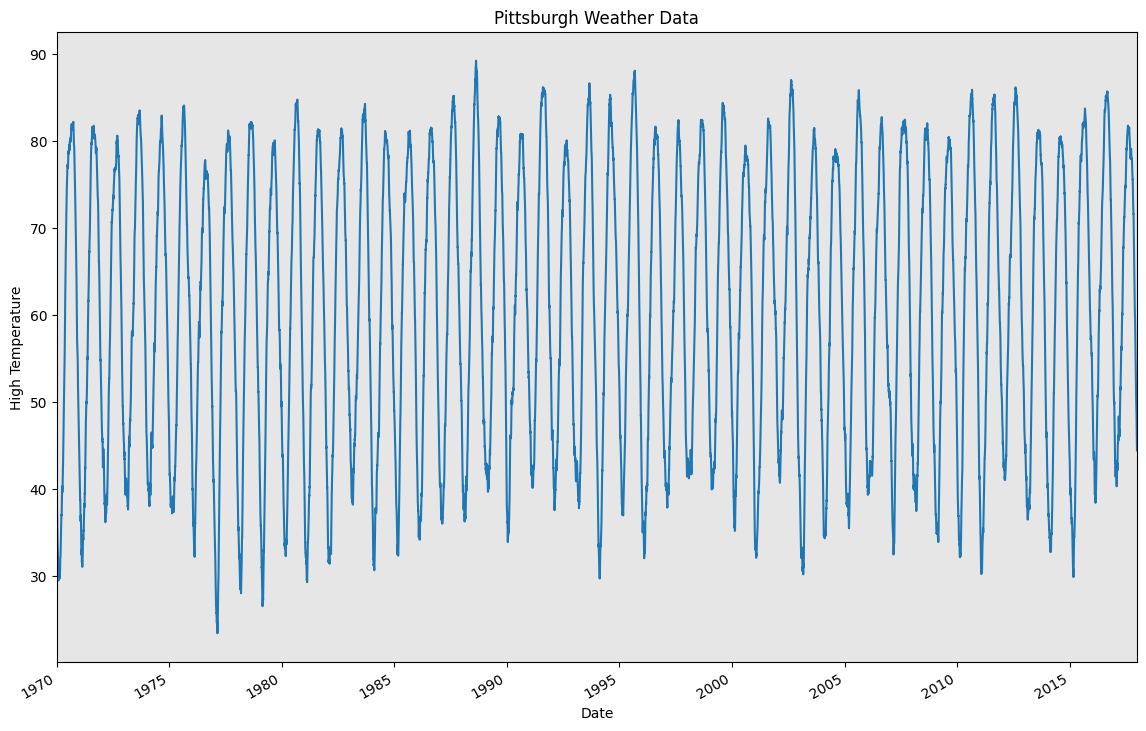

In [13]:
f_2 = plt.figure(figsize=(12,7), dpi=100)
ax_2 = f_2.add_axes([0.0, 0.0, 0.9, 0.9])
ax_2.set_ylabel('High Temperature')
ax_2.set_title('Pittsburgh Weather Data')
#df_2['tmax'].plot(xlim=['1974-12-21','2017-12-30'])
ax_2.set_facecolor((0.9, 0.9, 0.9))

# Let's create a rolling mean average using average of 60 days of max temps
df_2.rolling(window=60).mean()['tmax'].plot(xlim=['1970-01-01','2017-12-30'])

In [15]:
### ETS Decomposition


# ETS stands for Error Trend Seasonality and ETS decomposition
# can be used to seperate out these different components of a
# time series
from statsmodels.tsa.seasonal import seasonal_decompose

# Get built-in Seaborn datasets
sns.get_dataset_names()

# The flight dataset has both a clear trend and seasonality so
# we will use it
flight_df = sns.load_dataset('flights')
flight_df

# We want to have a date column and set it as an index, but we need
# a day column
flight_df['day']='01'


In [19]:
# We need to turn the month names to integers
flight_df['month'] = pd.to_datetime(flight_df.month, format='%b').dt.month
# Create a date column with our new dates
flight_df['date'] = pd.to_datetime(flight_df[['year', 'month', 'day']])
# Delete year, month and day columns
flight_df.drop('year', axis=1, inplace=True)
flight_df.drop('month', axis=1, inplace=True)
flight_df.drop('day', axis=1, inplace=True)
# Set date as index
flight_df.set_index('date', inplace=True)
flight_df


,passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


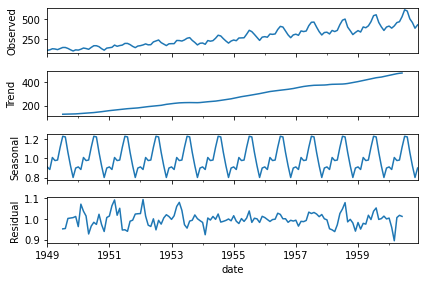

In [20]:
# There are 2 types of models
# The additive model is used when the trend is linear and the seasonal 
# and trend data seems to be constant over time (Trending in a line)
# The multiplicative model is used when we are increasing or decreasing 
# at a non-linear rate (Trending in multiples ie 2x, 3x, ...)

# Since the height of the cycles seem to be increasing we'll 
# use multiplicative
# Non-linear seasonality is where the frequency increases or decreases
# over time
sd = seasonal_decompose(flight_df['passengers'], model='multiplicative')

# Observed is the original chart
# Trend shows us if the number of passengers are tending up or down
# Seasonal data has had the trend data removed
# Residual data not effcted by trend and seasonal

sd.trend # Get trend data
sd.seasonal # Get seasonal 
sd.resid # Residual

# We can see that more people are flying each year from trend
# We can see that 
sd.plot();

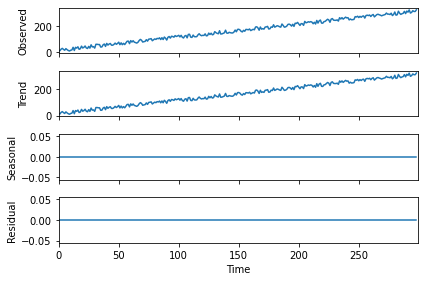

In [27]:
# Additive components

import random

# An additive model has a seasonality in which the width of cycles
# seem to be consistent. The trend also seems to follow a straight
# line
# I'll create a series with random values that increase to 300
add_df = [i + random.randrange(30) for i in range(1,300)]
sd = seasonal_decompose(add_df, model='additive', freq=1)
sd.plot();

,passengers,EWMA 6
date,,
1949-01-01,112,112.000000
1949-02-01,118,115.500000
1949-03-01,132,122.917431
1949-04-01,129,125.266892
1949-05-01,121,123.769332
...,...,...
1960-08-01,606,538.549357
1960-09-01,508,529.820969
1960-10-01,461,510.157835


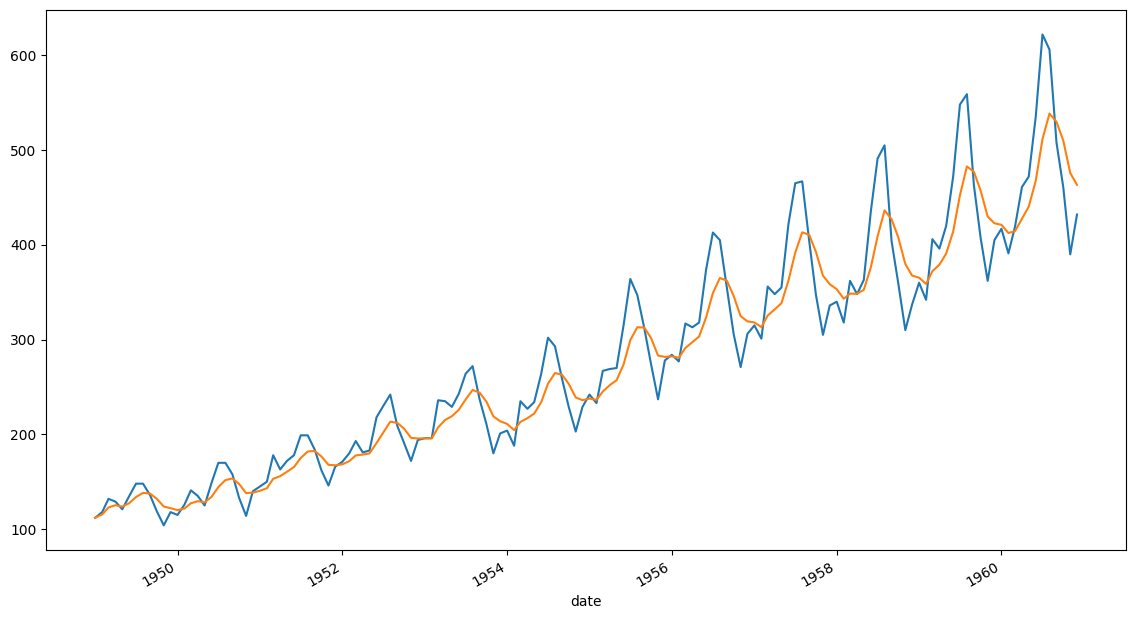

In [25]:
f_3 = plt.figure(figsize=(12,6), dpi=100)
ax_3 = f_3.add_axes([0.0, 0.0, 0.9, 0.9])
ax_3.plot(flight_df.index, flight_df['passengers'])

# I previously showed how we can create a moving average (6 months)
# which smoothes the plot but shows seasonality
# flight_df.rolling(window=6).mean()['passengers'].plot()
# If we use a larger window size we'll smooth the seasonality and
# focus more on the trend
# flight_df.rolling(window=12).mean()['passengers'].plot()

# But what if we wanted to weight more recent data because we assume it
# is more accurate? The standard moving average descibes all the data
# but it isn't good at predicting future behavior. SMAs are also skewed
# by extreme one time accurances.

# Check for NaN in data
flight_df['passengers'].isnull().values.any()

flight_df['EWMA 6'] = flight_df['passengers'].ewm(span=6).mean()
# The seasonality has less effect at the beginning versus the end
# because we have weighted the later points
flight_df['EWMA 6'].plot()

# The following applies when adjust=True
# As t increases more weight is given to later data
# a will be between 0 and 1
# x(t) is the number of passengers at time t
# EWMA(t) = x(t) + (1-a)*x(t-1) + (1-a)²*x(t-2) + ... / 1 + (1-a) + (1-a)² + ...

# Because a is a fraction as you square or take it to a higher 
# power you get smaller and smaller weights which means the
# data has less influence on the results as it gets older

# span : Defined in the number of days in your moving average

# com : (Center of Mass) : com=(span-1)/2

# halflife : Amount of time for the weight to be reduced by 1/2

# alpha : Specifies the value of a directly

flight_df